# Import

In [1]:
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.patches as patches

# Logs utils

#### Train logs utils

In [2]:
# Converts the smoothed values to a dictionnary of each values
def smoothed_value_to_str(smoothed_value):
    d_values = {}
    d_values['median'] = smoothed_value.median
    d_values['avg'] = smoothed_value.avg
    d_values['global_avg'] = smoothed_value.global_avg
    d_values['max'] = smoothed_value.max
    d_values['value'] = smoothed_value.value
    return d_values


# Converts the train logs from MetricLogger to list
def train_logs_to_lst(logs):
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].meters.keys():
            d[key] = smoothed_value_to_str(logs[i].meters[key])
        lst.append(d)
    return lst


# Puts the training logs into a json file with time dependent file name
def train_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    train_metric_logs = train_logs_to_lst(logs)
    filename = ftime + "_train_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(train_metric_logs, f, ensure_ascii=False, indent=4)


# Converts the train logs from MetricLogger to list
def train_logs_to_lst(logs):
    """Converts the train logs from MetricLogger to a list

    Args:
        logs (dict): dict containing MetricLogger data

    Returns:
        _type_: _description_
    """
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].meters.keys():
            d[key] = smoothed_value_to_str(logs[i].meters[key])
        lst.append(d)
    return lst


# Puts the training logs into a json file with time dependent file name
def train_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    train_metric_logs = train_logs_to_lst(logs)
    filename = ftime + "_train_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(train_metric_logs, f, ensure_ascii=False, indent=4)

#### Valid logs utils

In [3]:
# Merge the dicts of a list 
def merge_dict(logs):
    logs_better = []
    try:
        for i in range(len(logs)):
            logs_better.append({**logs[i][0], **logs[i][1], **logs[i][2], **logs[i][3]})
        return logs_better
    except:
        print(logs[0])
        logs_better = logs
        return logs_better

    
# Converts the valid logs from list of dictionnaries to string
def valid_logs_to_lst(valid_logs):
    if type(valid_logs) == list:
        return valid_logs
    logs = merge_dict(valid_logs)
    lst = []
    for i in range(len(logs)):
        d = {}
        for key in logs[i].keys():
            d[key] = logs[i][key].cpu().numpy().tolist()
        lst.append(d)
    return lst


# Puts the cis validation logs into a json file with time dependent file name
def cis_valid_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    valid_metric_logs = valid_logs_to_lst(logs)
    filename = ftime + "_cis_valid_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(valid_metric_logs, f, ensure_ascii=False, indent=4)


# Puts the trans validation logs into a json file with time dependent file name
def trans_valid_logs_to_json(logs, ftime=time.strftime("%Y%m%d_%H%M%S")):
    valid_metric_logs = valid_logs_to_lst(logs)
    filename = ftime + "_trans_valid_logs.json"
    
    with open('saved_logs/' + filename, 'w', encoding='utf-8') as f:
        json.dump(valid_metric_logs, f, ensure_ascii=False, indent=4)

# Plots for final report

### Every results compiled manually from summaries

In [4]:
# Model results for precision/recall

# Models for epochs comparison [cis_precision, trans_precison, cis_recall, trans_recall]
base_paper = [0.771, 0.702]

base_25 = [0.730, 0.653, 0.524, 0.506]
base_25_horiz_flip = [0.728, 0.647, 0.521, 0.503] # flip would maybe be better if we used a scheduler tuned for more precision

roi_10 = [0.835, 0.761, 0.568, 0.555]
roi_25 = [0.836, 0.763, 0.569, 0.556]
roi_25_horiz_flip = [0.836, 0.767, 0.567, 0.557]

rpn_10 = [0.861, 0.781, 0.590, 0.576]
rpn_25 = [0.863, 0.781, 0.591, 0.575]
rpn_50 = [0.865, 0.774, 0.592, 0.568]

rpn_50_bug = [0.895, 0.794, 0.603, 0.577] # (bug) different scheduler
rpn_75_bug = [0.897, 0.785, 0.594, 0.562] # (bug) different scheduler

# Set a baseline for the results on early models
baseline_1 = [base_25[1]]+[base_25[1]]+[base_25[3]]+[base_25[3]]

# Models with domain adaptation comparison 
# method31 : column normalization
# method32 : column and then row normalization

base_25_method31_512 = [0.720, 0.642, 0.519, 0.498]

rpn_10_method31_100 = [0.858, 0.774, 0.588, 0.563]
rpn_10_method31_512 = [0.862, 0.784, 0.590, 0.571]

rpn_10_method32_100 = [0.850, 0.763, 0.586, 0.583]
rpn_10_method32_512 = [0.858, 0.773, 0.588, 0.585]

rpn_50_method31_100 = [0.860, 0.774, 0.588, 0.568]
rpn_50_method31_512 = [0.864, 0.783, 0.590, 0.569]

# Models with data augmentation comparison
# baseline_3 = roi_25

base_paper = [0.771, 0.702]

base_25 = [0.730, 0.653, 0.524, 0.506]

roi_25_online_augment = [0.783, 0.670, 0.535, 0.523]
roi_25_offline_augment = [0.843, 0.763, 0.570, 0.552]

rpn_10_online_augment = ["training"]
rpn_10_online_augment_method31_512 = ["training"]

## Early models (no methods)

In [5]:
results_1 = np.array([base_25, base_25_horiz_flip, roi_10, roi_25, roi_25_horiz_flip, rpn_10, rpn_25, rpn_50, 
                      rpn_50_bug, rpn_75_bug])
results_1_index = ["BASE 25 epochs", "BASE 25 epochs\nhorizontal flip", "ROI 10 epochs", "ROI 25 epochs", 
                 "ROI 25 epochs\nhorizontal flip", "RPN+ROI 10 epochs", "RPN+ROI 25 epochs", "RPN+ROI 50 epochs", 
                 "RPN+ROI 50 epochs\nUncanny Scheduler", "RPN+ROI 75 epochs\nUncanny Scheduler"]
results_1.shape[0] == len(results_1_index)

True

#### PLOT 1: Precison

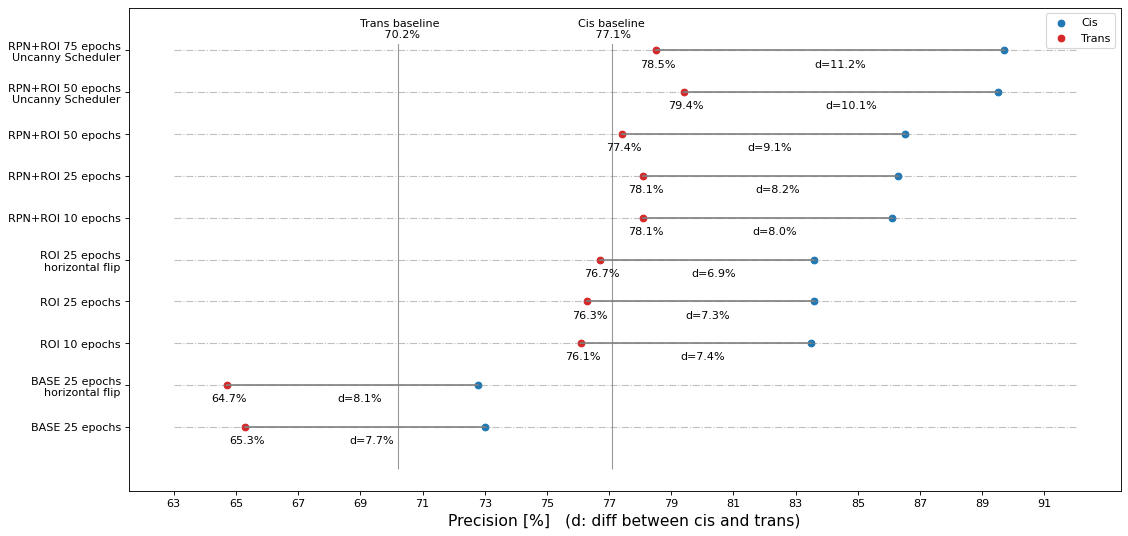

In [6]:
# Calculates the difference between the different results and the baseline
diffs_cis_trans_1_prec = np.round((results_1[:, :1] - results_1[:, 1:2])*100, 3)

# Values to change for plot
results = results_1
diffs_cis_trans = diffs_cis_trans_1_prec
index = results_1_index
cis_val = results[:, 0]*100
trans_val = results[:, 1]*100
n = len(cis_val)
x = np.arange(n)
base_cis = base_paper[0]
base_trans = base_paper[1]
min_x = np.ceil(np.min(trans_val) - 2)
max_x = np.ceil(np.max(cis_val) + 2)

# Make the plot

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)
# Precision
ax.scatter(x = cis_val, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_val, y = x, label='Trans', color="tab:red")
ax.hlines(y=index, xmin=min_x, xmax=max_x, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=base_cis*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.vlines(x=base_trans*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.text(base_trans*100-1.2, results.shape[0]-0.7, 'Trans baseline\n       70.2%', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(base_cis*100-1.1, results.shape[0]-0.7, 'Cis baseline\n     77.1%', bbox=dict(facecolor='white', edgecolor='none'))

for i in range(n):
    plt.plot([trans_val[i], cis_val[i]], [i, i], color='tab:gray')
    plt.text(trans_val[i] - 0.5 + diffs_cis_trans[i]/2, i-0.4, 'd=' + ''.join(map(str, diffs_cis_trans[i])) + '%')
    plt.text(trans_val[i] - 0.5, i-0.4, str(round(trans_val[i], 3)) + '%')

# ax.set_title('Precision of the paper baseline against our domain adaptation models\n'+
#              'ordered by number of epochs per model', fontdict={'size':18})
ax.set_xlabel('Precision [%]   (d: diff between cis and trans)', fontdict={'size':14})
ax.set_xticks(np.arange(min_x, max_x, 2.0))
ax.legend()
fig.savefig("saved_figures/main_report_figures/early_models_precision_figure.jpg")

#### PLOT 2: Recall

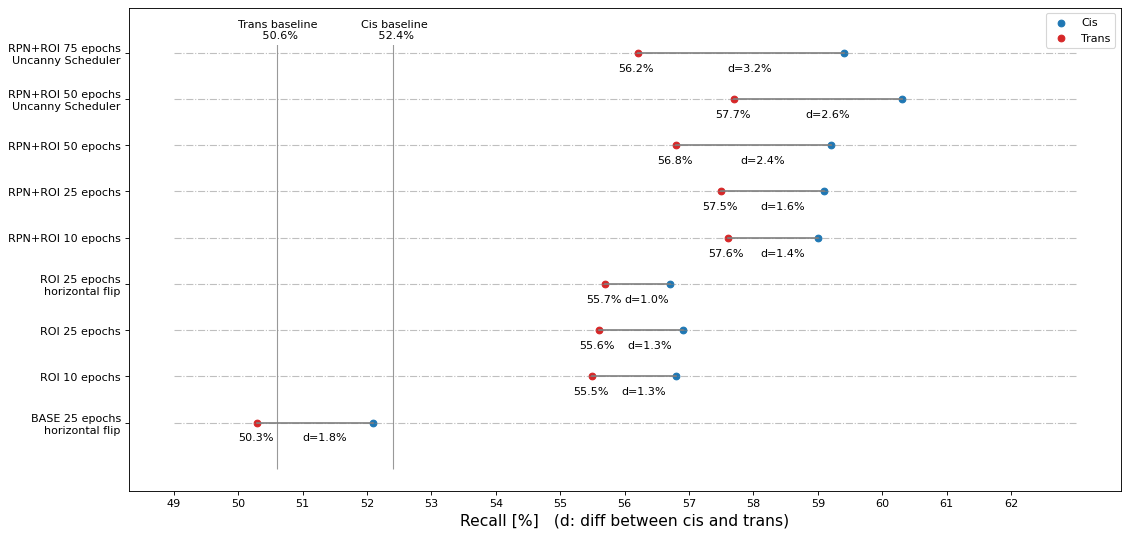

In [7]:
# Calculates the difference between the different results and the baseline
diffs_cis_trans_1_recall = np.round((results_1[:, 2:3] - results_1[:, 3:4])*100, 3)

# Values to change for plot
results = results_1[1:, :]
diffs_cis_trans = diffs_cis_trans_1_recall[1:, :]
index = results_1_index[1:]
cis_val = results[:, 2]*100
trans_val = results[:, 3]*100
n = len(cis_val)
x = np.arange(n)
base_cis = base_25[2]
base_trans = base_25[3]
min_x = np.ceil(np.min(trans_val) - 2)
max_x = np.ceil(np.max(cis_val) + 2)

# Make the plot

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)
# Precision
ax.scatter(x = cis_val, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_val, y = x, label='Trans', color="tab:red")
ax.hlines(y=index, xmin=min_x, xmax=max_x, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=base_cis*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.vlines(x=base_trans*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.text(base_trans*100-0.6, results.shape[0]-0.7, 'Trans baseline\n       50.6%', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(base_cis*100-0.5, results.shape[0]-0.7, 'Cis baseline\n     52.4%', bbox=dict(facecolor='white', edgecolor='none'))

for i in range(n):
    plt.plot([trans_val[i], cis_val[i]], [i, i], color='tab:gray')
    plt.text(trans_val[i] - 0.2 + diffs_cis_trans[i]/2, i-0.4, 'd=' + ''.join(map(str, diffs_cis_trans[i])) + '%')
    plt.text(trans_val[i] - 0.3, i-0.4, str(round(trans_val[i], 3)) + '%')

# ax.set_title('Recall of our baseline against our early test models\n'+
#              'ordered by trans precision (Baseline: 25 epochs, only predictors trained)', 
#              fontdict={'size':18})
ax.set_xlabel('Recall [%]   (d: diff between cis and trans)', fontdict={'size':14})
ax.set_xticks(np.arange(min_x, max_x, 1.0))
ax.legend()
fig.savefig("saved_figures/main_report_figures/early_models_recall_figure.jpg")

## Domain Adaptation

In [8]:
results_2 = np.array([rpn_10_method32_100, rpn_10_method32_512, rpn_10_method31_100, 
                      rpn_50_method31_100, rpn_50_method31_512, rpn_10_method31_512])
results_2_index = ["RPN 10 epochs\n Domain Adapt\nCol+Row Norm d=100", 
                   "RPN 10 epochs\n Domain Adapt\nCol+Row Norm d=512", "RPN 10 epochs\n Domain Adapt\nCol Norm d=100", 
                   "RPN 50 epochs\n Domain Adapt\nCol Norm d=100", "RPN 50 epochs\n Domain Adapt\nCol Norm d=512", 
                   "RPN 10 epochs\n Domain Adapt\nCol Norm d=512"]
results_2.shape[0] == len(results_2_index)

True

#### PLOT 3: Precision

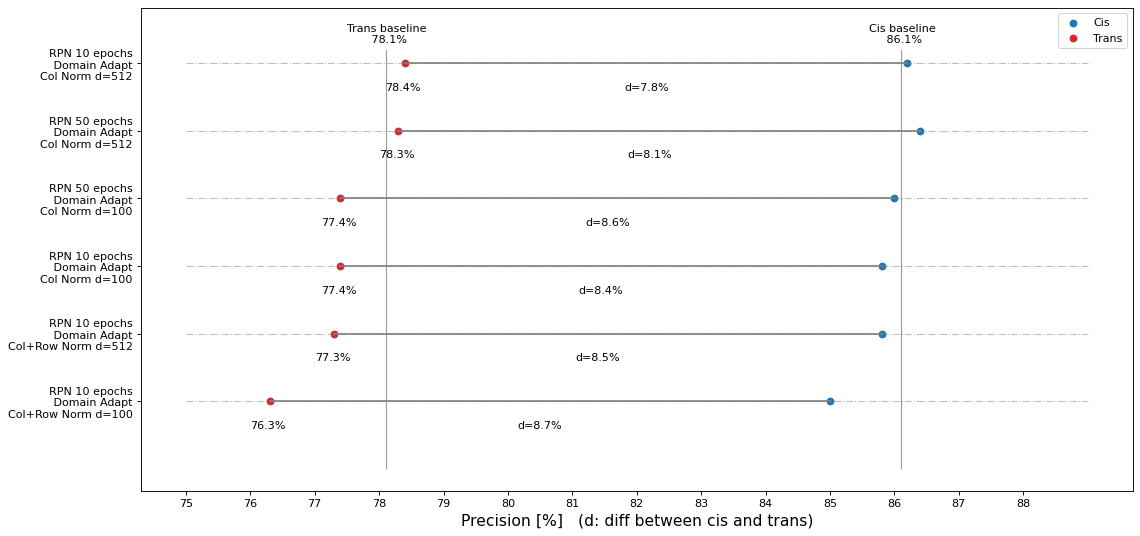

In [9]:
# Calculates the difference between the different results and the baseline
diffs_cis_trans_2 = np.round((results_2[:, :1] - results_2[:, 1:2])*100, 3)

# Values to change for plot
results = results_2
diffs_cis_trans = diffs_cis_trans_2
index = results_2_index
cis_val = results[:, 0]*100
trans_val = results[:, 1]*100
n = len(cis_val)
x = np.arange(n)
base_cis = rpn_10[0]
base_trans = rpn_10[1]
min_x = np.ceil(np.min(trans_val) - 2)
max_x = np.ceil(np.max(cis_val) + 2)

# Make the plot

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)
# Precision
ax.scatter(x = cis_val, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_val, y = x, label='Trans', color="tab:red")
ax.hlines(y=index, xmin=min_x, xmax=max_x, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=base_cis*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.vlines(x=base_trans*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.text(base_trans*100-0.6, results.shape[0]-0.7, 'Trans baseline\n       78.1%', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(base_cis*100-0.5, results.shape[0]-0.7, 'Cis baseline\n     86.1%', bbox=dict(facecolor='white', edgecolor='none'))

for i in range(n):
    plt.plot([trans_val[i], cis_val[i]], [i, i], color='tab:gray')
    plt.text(trans_val[i] - 0.5 + diffs_cis_trans[i]/2, i-0.4, 'd=' + ''.join(map(str, diffs_cis_trans[i])) + '%')
    plt.text(trans_val[i] - 0.3, i-0.4, str(round(trans_val[i], 3)) + '%')

# ax.set_title('Precision of the paper baseline against our domain adaptation models\n'+
#              'ordered by trans precision'
#              , fontdict={'size':18})
ax.set_xlabel('Precision [%]   (d: diff between cis and trans)', fontdict={'size':14})
ax.set_xticks(np.arange(min_x, max_x, 1.0))
ax.legend()
fig.savefig("saved_figures/main_report_figures/domain_adaptation_precision_figure.jpg")

#### PLOT 4: Recall

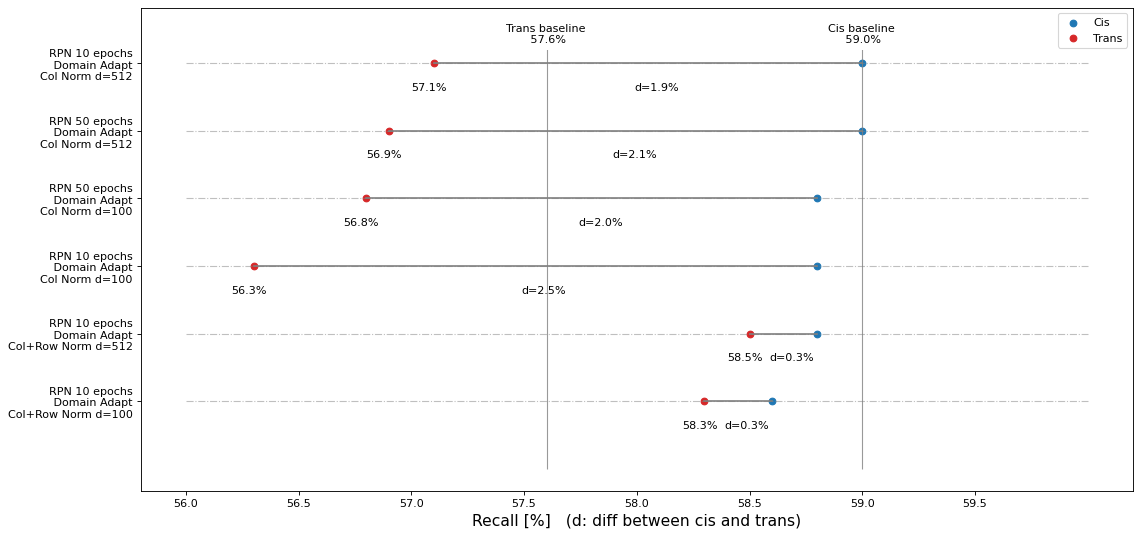

In [10]:
# Calculates the difference between the different results and the baseline
diffs_cis_trans_2_recall = np.round((results_2[:, 2:3] - results_2[:, 3:4])*100, 3)

# Values to change for plot
results = results_2
diffs_cis_trans = diffs_cis_trans_2_recall
index = results_2_index
cis_val = results[:, 2]*100
trans_val = results[:, 3]*100
n = len(cis_val)
x = np.arange(n)
base_cis = rpn_10[2]
base_trans = rpn_10[3]
min_x = np.ceil(np.min(trans_val) - 1)
max_x = np.ceil(np.max(cis_val) + 1)

# Make the plot

fig, ax = plt.subplots(figsize=(16,8), dpi= 80)
# Precision
ax.scatter(x = cis_val, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_val, y = x, label='Trans', color="tab:red")
ax.hlines(y=index, xmin=min_x, xmax=max_x, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=base_cis*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.vlines(x=base_trans*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.text(base_trans*100-0.180, results.shape[0]-0.7, 'Trans baseline\n       57.6%', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(base_cis*100-0.15, results.shape[0]-0.7, 'Cis baseline\n     59.0%', bbox=dict(facecolor='white', edgecolor='none'))

for i in range(n):
    plt.plot([trans_val[i], cis_val[i]], [i, i], color='tab:gray')
    plt.text(trans_val[i] - 0.06 + diffs_cis_trans[i]/2, i-0.4, 'd=' + ''.join(map(str, diffs_cis_trans[i])) + '%')
    plt.text(trans_val[i] - 0.1, i-0.4, str(round(trans_val[i], 3)) + '%')

# ax.set_title('Recall of our RPN baseline model against our domain adaptation models\n'+
#              'ordered by trans precision (Baseline: 10 epochs, RPN+ROI trained)', 
#              fontdict={'size':18})
ax.set_xlabel('Recall [%]   (d: diff between cis and trans)', fontdict={'size':14})
ax.set_xticks(np.arange(min_x, max_x, 0.5))
ax.legend()
fig.savefig("saved_figures/main_report_figures/domain_adaptation_recall_figure.jpg")

## Data Augmentation

In [11]:
results_3 = np.array([roi_25_online_augment, roi_25_offline_augment])
results_3_index = np.array(["ROI 25 epochs\nOnline Augmentation", "ROI 25 epochs\nOffline Augmentation"])
results_3.shape[0] == len(results_3_index)

True

#### PLOT 5: Precision

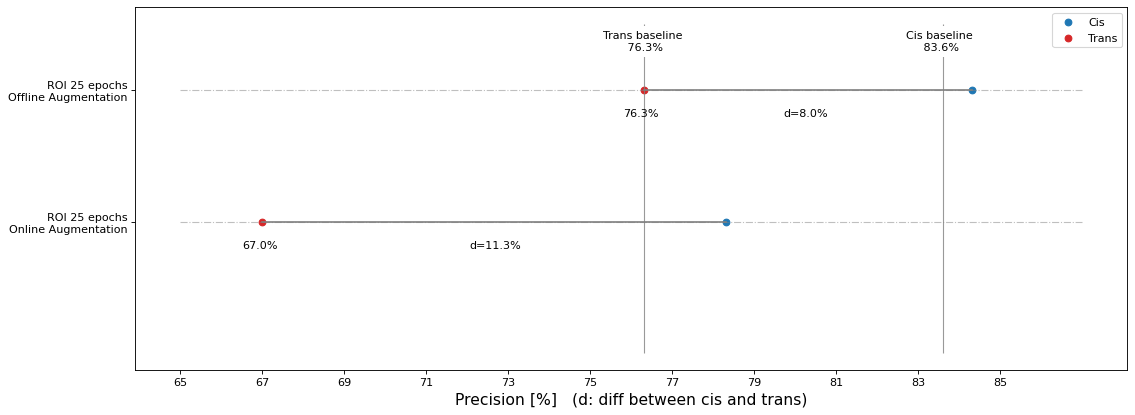

In [12]:
# Calculates the difference between the different results and the baseline
diffs_cis_trans_3 = np.round((results_3[:, :1] - results_3[:, 1:2])*100, 3)

# Values to change for plot
results = results_3
diffs_cis_trans = diffs_cis_trans_3
index = results_3_index
cis_val = results[:, 0]*100
trans_val = results[:, 1]*100
n = len(cis_val)
x = np.arange(n)
base_cis = roi_25[0]
base_trans = roi_25[1]
min_x = np.ceil(np.min(trans_val) - 2)
max_x = np.ceil(np.max(cis_val) + 2)

# Make the plot
fig, ax = plt.subplots(figsize=(16,6), dpi= 80)

ax.scatter(x = cis_val, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_val, y = x, label='Trans', color="tab:red")
ax.hlines(y=index, xmin=min_x, xmax=max_x, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=base_cis*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.vlines(x=base_trans*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.text(base_trans*100-1, results.shape[0]-0.7, 'Trans baseline\n       76.3%', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(base_cis*100-0.9, results.shape[0]-0.7, 'Cis baseline\n     83.6%', bbox=dict(facecolor='white', edgecolor='none'))

for i in range(n):
    plt.plot([trans_val[i], cis_val[i]], [i, i], color='tab:gray')
    plt.text(trans_val[i] - 0.6 + diffs_cis_trans[i]/2, i-0.2, 'd=' + ''.join(map(str, diffs_cis_trans[i])) + '%')
    plt.text(trans_val[i] - 0.5, i-0.2, str(round(trans_val[i], 3)) + '%')

# ax.set_title('Precision of the paper baseline against our data augmentation models\n'+
#              'ordered by trans precision'
#              , fontdict={'size':18})
ax.set_xlabel('Precision [%]   (d: diff between cis and trans)', fontdict={'size':14})
ax.set_xticks(np.arange(min_x, max_x, 2.0))
ax.legend()
fig.savefig("saved_figures/main_report_figures/data_augmentation_precision_figure.jpg")

#### PLOT 6: Recall

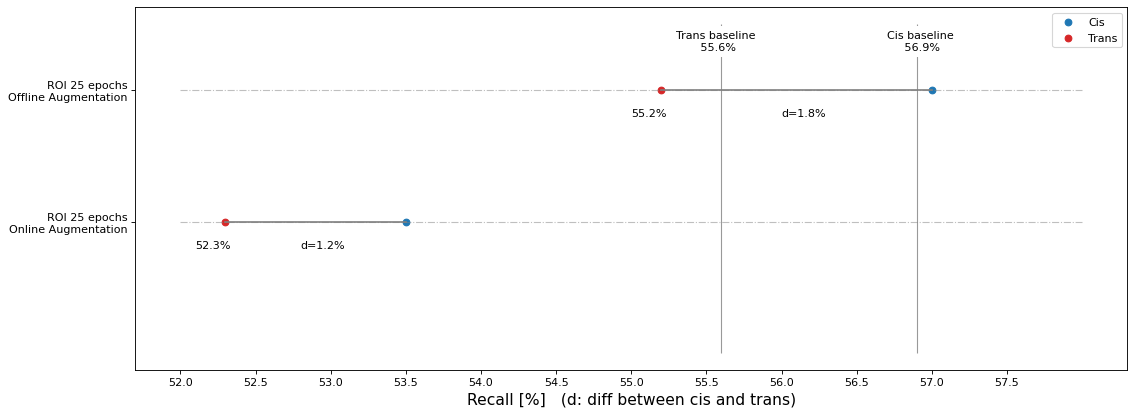

In [13]:
# Calculates the difference between the different results and the baseline
diffs_cis_trans_3_recall = np.round((results_3[:, 2:3] - results_3[:, 3:4])*100, 3)

# Values to change for plot
results = results_3
diffs_cis_trans = diffs_cis_trans_3_recall
index = results_3_index
cis_val = results[:, 2]*100
trans_val = results[:, 3]*100
n = len(cis_val)
x = np.arange(n)
base_cis = roi_25[2]
base_trans = roi_25[3]
min_x = np.ceil(np.min(trans_val) - 1)
max_x = np.ceil(np.max(cis_val) + 1)

# Make the plot

fig, ax = plt.subplots(figsize=(16,6), dpi= 80)
# Precision
ax.scatter(x = cis_val, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_val, y = x, label='Trans', color="tab:red")
ax.hlines(y=index, xmin=min_x, xmax=max_x, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=base_cis*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.vlines(x=base_trans*100, ymin=-1, ymax=n-0.5, color='gray', alpha=0.8, linewidth=1)
ax.text(base_trans*100-0.3, results.shape[0]-0.7, 'Trans baseline\n       55.6%', bbox=dict(facecolor='white', edgecolor='none'))
ax.text(base_cis*100-0.2, results.shape[0]-0.7, 'Cis baseline\n     56.9%', bbox=dict(facecolor='white', edgecolor='none'))

for i in range(n):
    plt.plot([trans_val[i], cis_val[i]], [i, i], color='tab:gray')
    plt.text(trans_val[i] - 0.1 + diffs_cis_trans[i]/2, i-0.2, 'd=' + ''.join(map(str, diffs_cis_trans[i])) + '%')
    plt.text(trans_val[i] - 0.2, i-0.2, str(round(trans_val[i], 3)) + '%')

# ax.set_title('Recall of our RPN baseline model against our data augmentation models\n'+
#              'ordered by trans precision (Baseline: 25 epochs, ROI trained)', 
#              fontdict={'size':18})
ax.set_xlabel('Recall [%]   (d: diff between cis and trans)', fontdict={'size':14})
ax.set_xticks(np.arange(min_x, max_x, 0.5))
ax.legend()
fig.savefig("saved_figures/main_report_figures/data_augmentation_recall_figure.jpg")

# Unused stuff to keep in case (undocumented)

## Looking at/Loading the logs in convenient ways
Here we define the variables "train_logs", "cis_valid_logs" and "trans_valid_logs" that will be used in the methods for the results and the visualisations.

We can import logs or use the ones from training.

### Load logs right here

In [14]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_rpn_roi_1' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_logs = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_valid_logs = json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_valid_logs = json.load(f)

### Combine with some other logs right here

In [15]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '50_rpn_roi_1' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_logs = train_logs + json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_valid_logs = cis_valid_logs + json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_valid_logs = trans_valid_logs + json.load(f)

In [16]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '75_rpn_roi_1' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_logs = train_logs + json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_valid_logs = cis_valid_logs + json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_valid_logs = trans_valid_logs + json.load(f)

## Results

In [17]:
# To confirm that the data is loaded properly
n = len(train_logs)
print(n)

75


In [18]:
# Train loss to print (here we use global_avg but we can use: value, median, avg, max or global_avg)
results_train_loss = []

for i in range(n):
    results_train_loss.append(train_logs[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss = [] # cis

for i in range(n):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_valid_logs[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss = [] # trans

for i in range(n):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_valid_logs[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss.append(loss_interm)

### Plots

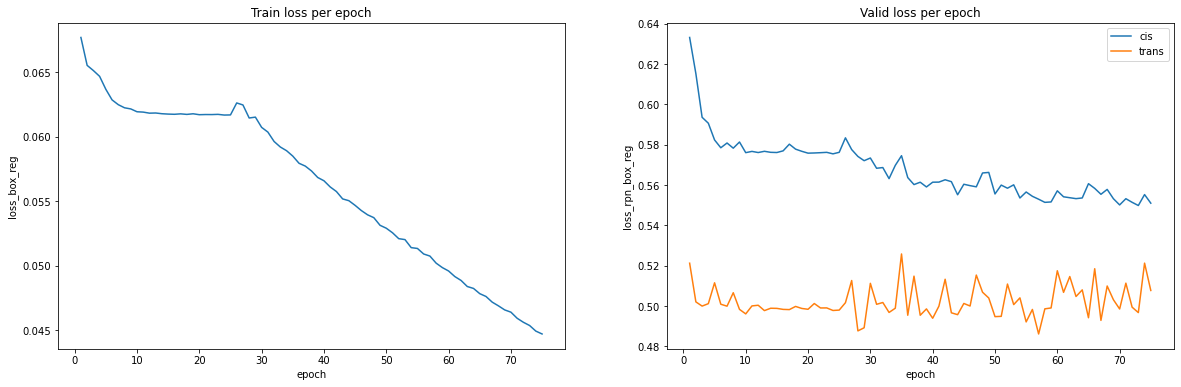

In [19]:
# Printing the different plots
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(np.arange(1, n + 1), results_train_loss, label='train')
ax[0].set_title('Train loss per epoch')
ax[0].set_ylabel('loss_box_reg')
ax[0].set_xlabel('epoch')

plt.title('Train loss per epoch')
ax[1].plot(np.arange(1, n + 1), results_cis_valid_loss, label='cis')
ax[1].plot(np.arange(1, n + 1), results_trans_valid_loss, label='trans')
ax[1].set_title('Valid loss per epoch')
ax[1].set_ylabel('loss_rpn_box_reg')
ax[1].set_xlabel('epoch')
ax[1].legend()

#### Save the figure 

In [21]:
fig.savefig("saved_figures/main_report_figures/full_75_rpn_roi_1_figure.jpg")

# Training

In [ ]:
plt.bar

In [ ]:
plt.bar(np.arange(1, 3 + 1), cis_results, label='xd')
plt.bar(np.arange(1, 3 + 1), trans_results)
plt.title('Precision over number of epochs')
plt.show

In [ ]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_base' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_base = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_base = json.load(f)

# Import trans valid logsw
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_base = json.load(f)

In [ ]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_roi_4_vision_version_diff' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_roi = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_roi = json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_roi = json.load(f)

In [ ]:
# Imported logs - format: name = "NAME_OR_TIME"      Exemple file format: "NAME_OR_TIME_train_logs"

file_time_or_nickname = '25_rpn_roi_1' # VALUE TO CHANGE TO THE IMPORTED FILES

# Import training logs
with open('saved_logs/' + file_time_or_nickname + '_train_logs.json', "r") as f:
    train_rpn_roi = json.load(f)

# Import cis valid logs
with open('saved_logs/' + file_time_or_nickname + '_cis_valid_logs.json', "r") as f:
    cis_rpn_roi = json.load(f)

# Import trans valid logs
with open('saved_logs/' + file_time_or_nickname + '_trans_valid_logs.json', "r") as f:
    trans_rpn_roi = json.load(f)

In [ ]:
num_epochs = len(train_base)

In [ ]:
# base
results_train_loss_base = []

for i in range(num_epochs):
    results_train_loss_base.append(train_base[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss_base = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_base[(167 * i) + j]['loss_box_reg']
    results_cis_valid_loss_base.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_base = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_base[(154 * i) + j]['loss_box_reg']
    results_trans_valid_loss_base.append(loss_interm)

In [ ]:
# roi
results_train_loss_roi = []

for i in range(num_epochs):
    results_train_loss_roi.append(train_roi[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_roi[(167 * i) + j]['loss_box_reg']
    results_cis_valid_loss_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_roi[(154 * i) + j]['loss_box_reg']
    results_trans_valid_loss_roi.append(loss_interm)

In [ ]:
# rpn+roi
results_train_loss_rpn_roi = []

for i in range(num_epochs):
    results_train_loss_rpn_roi.append(train_rpn_roi[i]['loss_box_reg']['global_avg'])
    
# Cis valid loss to print
results_cis_valid_loss_rpn_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_rpn_roi[(167 * i) + j]['loss_box_reg']
    results_cis_valid_loss_rpn_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_rpn_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_rpn_roi[(154 * i) + j]['loss_box_reg']
    results_trans_valid_loss_rpn_roi.append(loss_interm)

In [ ]:
# Printing the different plots
fig, ax = plt.subplots(1,2, figsize=(14,4))

ax[0].plot(np.arange(1, num_epochs + 1), results_train_loss_base, label='base')
ax[0].plot(np.arange(1, num_epochs + 1), results_train_loss_roi, label='roi')
ax[0].plot(np.arange(1, num_epochs + 1), results_train_loss_rpn_roi, label='rpn+roi')
ax[0].set_title('Train loss per epoch')
ax[0].set_ylabel('loss_box_reg')
ax[0].set_xlabel('epoch')
ax[0].legend()

plt.title('Train loss per epoch')
ax[1].plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_base, label='cis', color='tab:blue')
ax[1].plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_base, label='trans', color='tab:red')
ax[1].plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_roi, color='tab:blue')
ax[1].plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_roi, color='tab:red')
ax[1].plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_rpn_roi, color='tab:blue')
ax[1].plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_rpn_roi, color='tab:red')
ax[1].set_title('Valid loss per epoch')
ax[1].set_ylabel('loss_box_reg')
ax[1].set_xlabel('epoch')
ax[1].legend()

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

In [ ]:
fig.savefig("figures/baseline_vs_roi_vs_rpn_roi_training.png", transparent=True)

In [ ]:
# Cis valid loss to print
results_cis_valid_loss_base = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_base[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss_base.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_base = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_base[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss_base.append(loss_interm)

In [ ]:
# Cis valid loss to print
results_cis_valid_loss_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_roi[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_roi[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss_roi.append(loss_interm)

In [ ]:
# Cis valid loss to print
results_cis_valid_loss_rpn_roi = [] # cis

for i in range(num_epochs):
    loss_interm = 0
    for j in range(167):
        loss_interm += cis_rpn_roi[(167 * i) + j]['loss_rpn_box_reg']
    results_cis_valid_loss_rpn_roi.append(loss_interm)

# Trans valid loss to print
results_trans_valid_loss_rpn_roi = [] # trans

for i in range(num_epochs):
    loss_interm = 0
    for j in range(154):
        loss_interm += trans_rpn_roi[(154 * i) + j]['loss_rpn_box_reg']
    results_trans_valid_loss_rpn_roi.append(loss_interm)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,4))

plt.title('Train loss per epoch')
ax.plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_base, label='cis', color='tab:blue')
ax.plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_base, label='trans', color='tab:red')
ax.plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_roi, color='tab:blue')
ax.plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_roi, color='tab:red')
ax.plot(np.arange(1, num_epochs + 1), results_cis_valid_loss_rpn_roi, color='tab:blue')
ax.plot(np.arange(1, num_epochs + 1), results_trans_valid_loss_rpn_roi, color='tab:red')
ax.set_title('Valid loss per epoch')
ax.set_ylabel('loss_rpn_box_reg')
ax.set_xlabel('epoch')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
fig.savefig("saved_figures/baseline_vs_roi_vs_rpn_roi_training_rpn.png", transparent=True)

## Improvment [%] plot (not used)

In [ ]:
# Calculates the difference between the different results and the baseline
diffs_1 = np.array([round(results_1[j][i] - baseline_1[i], 4)*100 for j in range(len(results_1)) 
                                                                  for i in range(len(baseline_1))
                 ]).reshape(len(results_1), 4)
diffs_cis_trans_1 = np.round(diffs_1[:, :1] - diffs_1[:, 1:2], 3)

In [ ]:
# Define the cis accuracy and trans accuracy x axis data
cis_acc_diff = diffs_1[:,0]
trans_acc_diff = diffs_1[:,1]
x = np.arange(len(cis_acc))

In [ ]:
# Make the plot of improvments
fig, ax = plt.subplots(figsize=(16,8), dpi= 80)
# Precision
ax.scatter(x = cis_acc_diff, y = x, label="Cis", color="tab:blue")
ax.scatter(x = trans_acc_diff, y = x, label='Trans', color="tab:red")
ax.hlines(y=results_index, xmin=-2, xmax=27, color='gray', alpha=0.5, linewidth=1, linestyles='dashdot')
ax.vlines(x=0, ymin=-1, ymax=diffs_1.shape[0], color='gray', alpha=0.8, linewidth=1)
ax.text(-0.8, 9.1, 'Baseline')

for i in range(len(diffs_cis_trans_1)):
    plt.plot([trans_acc_diff[i],cis_acc_diff[i]], [i, i], color='tab:gray')
    plt.text(trans_acc_diff[i] -0.5 + diffs_cis_trans_1[i]/2, i-0.4, 'd=' + ''.join(map(str, diffs_cis_trans_1[i])) + '%')
    plt.text(trans_acc_diff[i] - 0.5, i-0.4, str(round(trans_acc_diff[i], 3)) + '%')

ax.set_title('Difference in precision between baseline and early models\n' +
             '(25 epochs, only CNN trained - trans accuracy: 65.3%)', fontdict={'size':18})
ax.set_xlabel('Improvement [%] with respect to the baseline accuracy', fontdict={'size':14})
ax.set_xticks(np.arange(-2, 27, 1.0))
ax.legend()